In [1]:
import io, os, sys, types
import import_ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from SimulationFunctions import *

importing Jupyter notebook from SimulationFunctions.ipynb


In [ ]:
ls

In [3]:
# experiment parameters
T = 100
mu = np.array([0.2, 0.8])

# number of repetitions for simulations
Nrep = 110
sim = [{'a': np.zeros((T, Nrep)), 'r': np.zeros((T, Nrep)), 'wsls': np.zeros((2, Nrep))}, \
       {'a': np.zeros((T, Nrep)), 'r': np.zeros((T, Nrep)), 'wsls': np.zeros((2, Nrep))}, \
       {'a': np.zeros((T, Nrep)), 'r': np.zeros((T, Nrep)), 'wsls': np.zeros((2, Nrep))}, \
       {'a': np.zeros((T, Nrep)), 'r': np.zeros((T, Nrep)), 'wsls': np.zeros((2, Nrep))}, \
       {'a': np.zeros((T, Nrep)), 'r': np.zeros((T, Nrep)), 'wsls': np.zeros((2, Nrep))}]

# Model 1: Random responding
for n in range(Nrep):
    b = 0.5
    a, r = simulate_M1random_v1(T, mu, b)
    sim[0]['a'][:, n] = a
    sim[0]['r'][:, n] = r
    
# Model 2: Win-stay-lose-shift
for n in range(Nrep):
    epsilon = 0.1
    a, r = simulate_M2WSLS_v1(T, mu, epsilon)
    sim[1]['a'][:, n] = a
    sim[1]['r'][:, n] = r

# Model 3: Rescorla Wagner
for n in range(Nrep):
    alpha = 0.1
    beta = 5
    a, r = simulate_M3RescorlaWagner_v1(T, mu, alpha, beta)
    sim[2]['a'][:, n] = a
    sim[2]['r'][:, n] = r
    
# Model 4: Choice kernel
for n in range(Nrep):
    alpha_c = 0.1
    beta_c = 3
    a, r = simulate_M4ChoiceKernel_v1(T, mu, alpha_c, beta_c)
    sim[3]['a'][:, n] = a
    sim[3]['r'][:, n] = r

# Model 5: Rescorla-Wagner + choice kernel
for n in range(Nrep):
    alpha = 0.1
    beta = 5
    alpha_c = 0.1
    beta_c = 1
    a, r = simulate_M5RWCK_v1(T, mu, alpha, beta, alpha_c, beta_c)
    sim[4]['a'][:, n] = a
    sim[4]['r'][:, n] = r
    

In [4]:
def analysis_WSLS_v1(a, r):
    
    aLast = np.append(np.nan, a[0:-1])
    stay = aLast == a
    rLast = np.append(np.nan, r[0:-1])
                      
    winStay = np.nanmean(stay[rLast == 1])
    loseStay = np.nanmean(stay[rLast == 0])
    out = np.array([loseStay, winStay])
    
    return out


In [5]:
# win-stay-lose-shift analysis
wsls = np.zeros((2, len(sim)))
for i in range(len(sim)):
    for n in range(Nrep):
        sim[i]['wsls'][:, n] = analysis_WSLS_v1(sim[i]['a'][:,n], sim[i]['r'][:, n])
    wsls[:, i] = np.nanmean(sim[i]['wsls'], axis=1)

Text(0, 0.5, 'probability of staying')

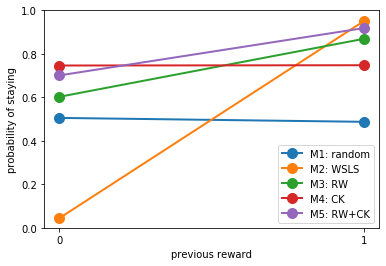

In [6]:
# plot WSLS behavior for all models
plt.figure()
plt.plot([0, 1], wsls, '.-', markersize=20, linewidth=2)
plt.ylim([0, 1])
plt.legend(["M1: random", "M2: WSLS", "M3: RW", "M4: CK", "M5: RW+CK"])
plt.xticks([0, 1])
plt.xlabel('previous reward')
plt.ylabel('probability of staying')